In [1]:
%matplotlib inline

In [2]:
import itertools 
from pathlib import Path

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import matplotlib.patheffects as PathEffects

import numpy as np
import pandas as pd

# (scale, length, randomness).)
#plt.xkcd()
import highlight_text as ht

import intro_plots as ip
from papercolors import colordict as pcd

paper_path = Path('../figures/')

In [3]:
df = pd.read_csv("plot_data")

In [4]:
df

,NAME,TEMP (°F),PRCP (in.),NEW YORK LAGUARDIA AP,ALBANY AP,NEW YORK JFK INTL AP,ISLIP LI MACARTHUR AP,ROCHESTER GTR INTL AP
0,NEW YORK LAGUARDIA AP,34.0,0.6614,0.000000,1.964987,0.183772,0.778735,4.458209
1,ALBANY AP,-27.0,0.2598,1.964987,0.000000,2.105025,2.073629,3.885503
2,NEW YORK JFK INTL AP,22.0,0.6299,0.183772,2.105025,0.000000,0.678512,4.632957
3,ISLIP LI MACARTHUR AP,21.0,0.5984,0.778735,2.073629,0.678512,0.000000,5.130889
4,ROCHESTER GTR INTL AP,-2.0,0.2205,4.458209,3.885503,4.632957,5.130889,0.000000


In [5]:
df['TC'] = df['TEMP (°F)'].astype(str) + ' °F'
df['PC'] = df['PRCP (in.)'].astype(str) + ' in.'
df['color'] = df['NAME'].replace(ip.cdict)
df['AC'] = df['NAME'].replace(ip.airport_codes)

In [129]:
drow1 = df[['AC', 'TC', 'PC']].loc[[0]]
vrow1 = df[['color','TEMP (°F)', 'PRCP (in.)']].loc[[0]]

In [152]:
drow2 = pd.DataFrame.from_dict([{'distance': f"{df['NEW YORK JFK INTL AP'].loc[0]:.2f}"}])
drow3 =  df[['AC', 'TC', 'PC']].loc[[2]] 

In [131]:
vvals = df[['color','TEMP (°F)', 'PRCP (in.)']].loc[[2]]

In [422]:
vvals

,color,TEMP (°F),PRCP (in.)
2,#000075,22.0,0.6299


In [731]:
def nuqfig(fname):
    if 'scatter' in fname:
        figsize=(10,5)
    else:
        figsize = (10,10)
        
    fig, axd =plt.subplot_mosaic([['tau', 'mu', 'rho'], ['k', '.', 's']], figsize=figsize, gridspec_kw={'height_ratios':[3,1]})

    if 'scatter' in fname:
        ind = 1
    elif 'line' in fname:
        ind=3
        
    width = .4
    height = .3
    inc = (height/3)
    dx, dy = 0, .6
    cx = dx-width

    bbox1 = [dx, dy, width, height]
    bbox2 = [dx, dy-2*height, width, inc]
    bbox3 = [dx, dy-height-inc, width, height]
    cbox1 = [cx, dy, width, height]
    cbox2 = [cx, dy-2*height, width, inc]
    cbox3 = [cx, dy-height-inc, width, height]


    (x0, x1), (y0, y1) = (vrow1['TEMP (°F)'].values.squeeze(), vvals['TEMP (°F)'].values.squeeze()), (vrow1['PRCP (in.)'].values.squeeze(), vvals['PRCP (in.)'].values.squeeze())
    xm = x0 + (x1-x0)*.6
    ym = y0 + (y1-y0)*.6
    vrow3 = pd.DataFrame.from_dict([{'x':f"{xm:.2f}", 'y':f"{ym:.2f}"}])
    vrow2 = pd.DataFrame.from_dict([{'thick':8}])
    tau =  ['tau', drow1, drow2[::-1], drow3, ['Name','TEMP (°F)', 'PRCP (in.)'], ['DIST'],  ['Name','TEMP (°F)', 'PRCP (in.)']]
    nu1 = ['color', 'x', 'y']
    nu2 = ['linewidth']
    nu3 = ['x_mid' + r'$(k_i)$', 'y_mid' + r'$(k_i)$']
    mu = ['mu', vrow1, vrow2, vrow3, nu1, nu2, nu3]

    for ax, row1, row2, row3, name1, name2, name3 in [tau, mu]:
        for row, bboxv in [(row1, bbox1), (row2, bbox2), (row3, bbox3)][:ind]:
            if row is not None:
                nr, nc = row.values.T.shape
                bbow = bboxv[:3] + [inc*nr]
                tau = axd[ax].table(row.values.T, cellLoc='left', bbox=bbow, transform=axd[ax].transData)

        if ax in ['tau']:
            if 'line' in fname:
                #top x
                axd[ax].text(cx+width/2, dy-inc/2, 'X', fontsize=20, ha='center', va='center', color=pcd['fiber'])
                #bottom x
                axd[ax].text(cx+width/2, dy-2*height+1.5*inc, 'X', fontsize=20, ha='center', va='center', color=pcd['fiber'])
            for name, cbox in [(name1, cbox1), (name2, cbox2), (name3, cbox3)][:ind]:

                col = axd[ax].table([[n] for n in name], bbox=cbox, edges='open', transform=axd[ax].transData)
                for i in range(len(name)):
                    col[i,0].get_text().set_color(pcd['fiber'])
        axd[ax].axis('off')

    #scatter nu
    for i, (mu, box) in enumerate([(nu1, bbox1), (nu2, bbox2), (nu3, bbox3)][:ind]):
        sx = box[0] + width
        tx = box[0]
        sy = box[1] + (inc/2)
        for i, nu in enumerate(mu[::-1]):
            nuarr = mpatches.ConnectionPatch((sx,sy), (tx,sy),  coordsA=axd['tau'].transData, coordsB=axd['mu'].transData,
                                      color=pcd['artist'], arrowstyle="->", lw=2)
            fig.add_artist(nuarr)

            fig.text(.75,sy+.01, f"{nu}", color=pcd['artist'], ha='center', va='bottom', transform=axd['tau'].transData)
            sy+=inc

    #line nu 
    if 'line' in fname:
        #cross nu:
        (sx, sy), (tx,ty) =  [(dx+width, dy+ inc+inc/2), (dx, dy-height+inc/2)]
        for yoff, nul in zip([0, inc], nu3):
            nuarr = mpatches.ConnectionPatch((sx,sy-yoff), (tx,ty-yoff),  coordsA=axd['tau'].transData, 
                        coordsB=axd['mu'].transData, color=pcd['artist'], arrowstyle="->", lw=2)
            fig.add_artist(nuarr)



    s=250
    xsc, ysc = vrow1['TEMP (°F)'].values.squeeze(), vrow1['PRCP (in.)'].values.squeeze()
    axd['rho'].scatter(xsc, ysc, color=vrow1['color'], s=s, edgecolor='k')
  
    
    if 'line' in fname:
        axd['rho'].scatter(vvals['TEMP (°F)'], vvals['PRCP (in.)'], color='.9', s=s,)
        axd['rho'].plot((x0, x1), (y0, y1), color='.9', lw=5, zorder=-2)
        slope = (y1-y0)/(x1-x0)
        b = y1 - slope*x1
        xp = .01
        xsw = [xm-xp, xm+xp]
        ysw = [slope*x + b for x in xsw]
        axd['rho'].plot(xsw, ysw, lw=vrow2['thick'].values, zorder=2, color='green')


    axd['rho'].spines[:].set_sketch_params(1, 100, 10)
    axd['rho'].spines[:].set_color('gray')
    axd['rho'].set(xlim=(20, 40), ylim=(.62, .68))
    axd['rho'].tick_params(right=True, left=False, labelleft=False, labelright=True, colors='gray')

    (x0, y0), (x1, y1) = (dx+width+.02, dy+height/2), (xsc-.5, ysc-.0005)
    angle = np.degrees(np.arctan((x1-x0)/(y0-y1)))

    q1 = mpatches.ConnectionPatch((x0,y0), (x1, y1),
                                  coordsA=axd['mu'].transData, coordsB=axd['rho'].transData,
                                  color=pcd['artist'], arrowstyle=f"]->, widthA=3, lengthA=1.25,angleA=7",
                                  lw=3, mutation_scale=20)
    fig.add_artist(q1)

    if 'line' in fname:
        q2 = mpatches.ConnectionPatch((x0, dy-1.35*height), (xm, ym),
                                      coordsA=axd['mu'].transData, coordsB=axd['rho'].transData,
                                      color=pcd['artist'], arrowstyle="]->, widthA=4, lengthA=2,angleA=-20", lw=3, mutation_scale=20)
        fig.add_artist(q2)

    axd['k'].scatter(.5, .5, color=pcd['base'])
    axd['k'].set(aspect='equal', ylim=(0,1), xlim=(0,2))
    ckey = 'section' if 'scatter' in fname else 'base'
    axd['s'].add_artist(mpatches.Circle((.5, .5), .25, facecolor=mcolors.to_rgba(pcd[ckey], alpha=.15), edgecolor=pcd['base']))
    axd['s'].set(aspect='equal', ylim=(0,1), xlim=(0,2.5))
    
    if 'line' in fname:
        axd['k'].scatter(1.5, .5, color=pcd['base'])
        axd['k'].hlines(.5, .5, 1.5, color=pcd['base'])
        axd['s'].add_artist(mpatches.Rectangle((.75, .25+.25/2), 1, .25, 
                            facecolor=mcolors.to_rgba(pcd['base'], alpha=.15), edgecolor=pcd['base']))
        axd['s'].add_artist(mpatches.Circle((2, .5), .25, 
                                            facecolor=mcolors.to_rgba(pcd['base'], alpha=.15), edgecolor=pcd['base']))
    if 'scatter' in fname:
        xi = mpatches.ConnectionPatch((.25,.5), (.5,.5), axd['s'].transData, axd['k'].transData, 
                                     color=pcd['functor'], arrowstyle="->", mutation_scale=20, lw=2)
    else:
        xi = mpatches.ConnectionPatch((.25,.5), (1.5,.5), axd['s'].transData, axd['k'].transData, 
                                     color=pcd['functor'], arrowstyle="->", mutation_scale=20, lw=2)
            
    axd['k'].add_artist(xi)
    axd['k'].text(3, .5, r"$\xi$", fontsize=14, color=pcd['functor'], va='bottom', ha='center')
        
    axd['s'].axis('off')
    axd['k'].axis('off')   
    
    #tau, mu. rho
    for axn, lab in [('tau', r'$\tau$'), ('mu', '$\mu$')]:
        
        if 'scatter' in fname:
            sx, sy = (.5, .5)
            tx, ty = (dx+width/2, dy)
        else:
            tx, ty = (dx+width/2, dy-2*height)
            sx, sy = (.5+.45, .5)
        sec = mpatches.ConnectionPatch((sx,sy), (tx, ty), axd['k'].transData, 
                                       axd[axn].transData, color=pcd['section'], 
                                       arrowstyle="->", mutation_scale=20)
        fig.add_artist(sec)
                                           
        axd[axn].text(tx-.05, ty-.1, lab, fontsize=14, color=pcd['section'], ha='center')
    
    if 'scatter' in fname:    
        secrh = mpatches.ConnectionPatch((.5, .75), (xsc, ysc-yp), axd['s'].transData, axd['rho'].transData, 
                                         color=pcd['section'], arrowstyle="->", mutation_scale=20)
        axd['rho'].text(xsc-1, ysc-.01, r'$\rho|_{\xi^{-1}}$', fontsize=14, color=pcd['section'])
    else:
        secrh = mpatches.ConnectionPatch((.5+.45, .5+.25/2), (xm, ym-yp), axd['s'].transData, axd['rho'].transData, 
                                         color=pcd['section'], arrowstyle="->", mutation_scale=20)
        axd['s'].vlines(.5+.45,  .25+.25/2,  .5+.25/2, color=pcd['section'])
        axd['rho'].text(xm+1, ym-.01, r'$\rho|_{\xi^{-1}}$', fontsize=14, color=pcd['section'], ha='left')
    fig.add_artist(secrh)   
   
    
    fig.savefig(paper_path/f'{fname}.png', dpi=200, bbox_inches='tight' )

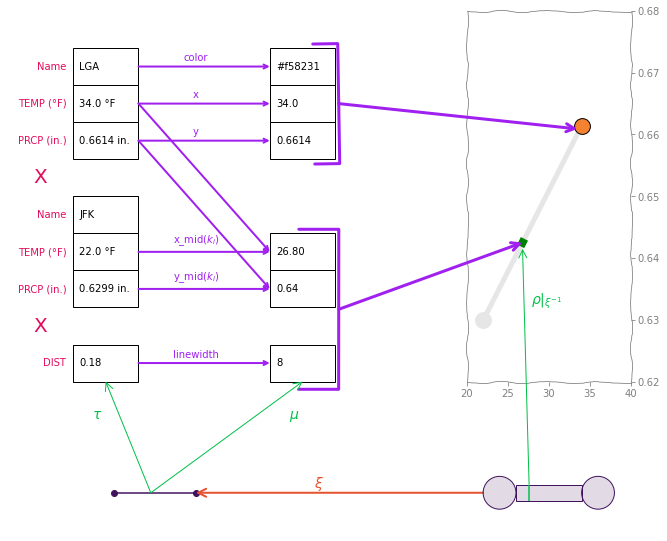

In [732]:
nuqfig("full_line")

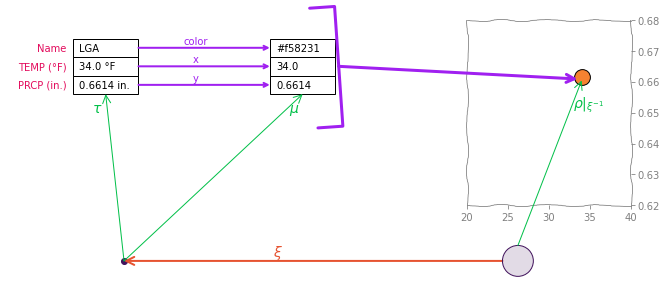

In [644]:
nuqfig("full_scatter")

In [37]:
dy - height

0.19999999999999996

In [ ]:
(xm, ym),

In [ ]:
(x0, x1), (y0, y1)